<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/jkh_predictions_with_FFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Mounted at /content/drive


In [2]:
import numpy as np

data=np.load(path+'datajkh1.npy')
target=np.load(path+'targetjkh1.npy')

In [3]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2554, 50, 4)
(2554,)
(50, 4)


In [4]:
train_data=data[:1787]
train_target=target[:1787]

test_data=data[1787:]
test_target=target[1787:]

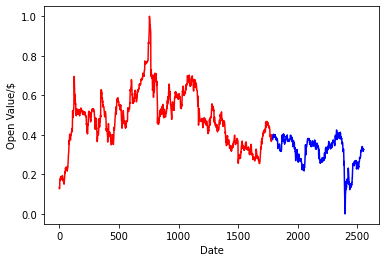

In [5]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1787,2554,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [6]:
print(data.shape[1:])

(50, 4)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model=Sequential()

model.add(Dense(512,activation="relu",input_shape=(data.shape[1:])))
#model.add(Dropout(0.5))
#model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1,activation="linear"))

model.compile(loss='mse',optimizer='adam', metrics=['Accuracy','mse', 'mae', 'mape'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50, 512)           2560      
_________________________________________________________________
dense_1 (Dense)              (None, 50, 256)           131328    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 128)           32896     
_________________________________________________________________
dense_3 (Dense)              (None, 50, 64)            8256      
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3201      
Total params: 178,241
Trainable params: 178,241
Non-trainable params: 0
__________________________________________________

In [8]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
51/51 [==============================] - 4s 15ms/step - loss: 0.0549 - accuracy: 0.0000e+00 - mse: 0.0549 - mae: 0.1637 - mape: 33.1009 - val_loss: 0.0025 - val_accuracy: 0.0000e+00 - val_mse: 0.0025 - val_mae: 0.0442 - val_mape: 13.5454
Epoch 2/200
51/51 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - mse: 0.0032 - mae: 0.0434 - mape: 8.9117 - val_loss: 0.0010 - val_accuracy: 0.0000e+00 - val_mse: 0.0010 - val_mae: 0.0273 - val_mape: 8.3578
Epoch 3/200
51/51 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - mse: 0.0014 - mae: 0.0278 - mape: 5.9540 - val_loss: 6.0911e-04 - val_accuracy: 0.0000e+00 - val_mse: 6.0911e-04 - val_mae: 0.0211 - val_mape: 6.3196
Epoch 4/200
51/51 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - mse: 0.0012 - mae: 0.0268 - mape: 5.5600 - val_loss: 3.8207e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.8207e-04 - val_mae: 0.0162 - val_mape: 

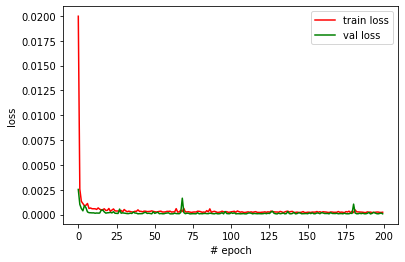

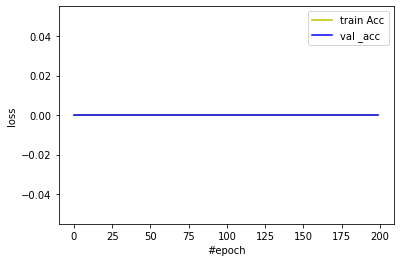

In [9]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],'y',label='train Acc')
plt.plot(history.history['val_accuracy'],'b',label='val _acc')
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9566365511253958


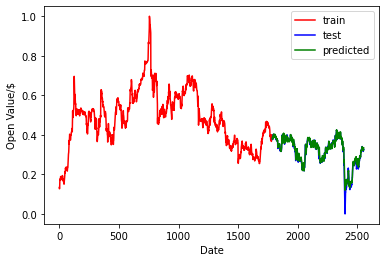

In [11]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1787,2554,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

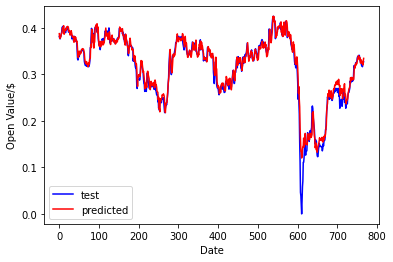

In [12]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()